# Sensitivity analyse

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
original_cost = 0.0

df = pd.read_csv('C:\\Users\\thibo\\OneDrive - Hanzehogeschool Groningen\\Documenten\\Github\\UNAL_thesis\\optimization\\Linear_programming\\results_sensitivity\\sensitivity_data_rand_1000_no_forecast_v2.csv')
#probleem, berekening is gebeurd met $/kWh terwijl de waardes echt van $/MWh waren ==> alles delen door 1000
#de optimalisatie klopt alleen zijn de resultaten gwn met factor duizend te groot (behalve de vermogens)
#don't show df errors
columns_divide_by_1000 = ['price_hydro [$/kWh]',
                        'price_solar [$/kWh]', 
                        'price_wind [$/kWh]', 
                        'price_thermal [$/kWh]',
                        'price_cogen [$/kWh]',
                        'co2_hydro [kg/kWh]',
                        'co2_solar [kg/kWh]',
                        'co2_wind [kg/kWh]',
                        'co2_thermal [kg/kWh]',
                        'co2_cogen [kg/kWh]',
                        'cost_conventional [$]',
                        'co2_conventional [kg]',
                        'original_cost_new_param [$]',
                        'original_co2_new_param [kg]'
    ]
for column in columns_divide_by_1000:
    df[column] = df[column]/1000
pd.set_option('mode.chained_assignment', None)

print("dropped rows: ", len(df[df['wind_capacity [kW]'] < 50320]))
df = df[df['wind_capacity [kW]'] >= 50320]
print("dropped rows: ", len(df[df['solar_capacity [kW]'] < 773500]))
df = df[df['solar_capacity [kW]'] >= 773500]

df

dropped rows:  311
dropped rows:  0


,strategy,price_hydro [$/kWh],price_solar [$/kWh],price_wind [$/kWh],price_thermal [$/kWh],price_cogen [$/kWh],co2_hydro [kg/kWh],co2_solar [kg/kWh],co2_wind [kg/kWh],co2_thermal [kg/kWh],co2_cogen [kg/kWh],wind_capacity [kW],solar_capacity [kW],cost_conventional [$],co2_conventional [kg],original_cost_new_param [$],original_co2_new_param [kg]
0,cost_conventional,0.0627,0.068410,0.090970,0.132,0.07035,0.0228,0.03895,0.01100,0.4950,0.21700,1.617271e+06,2.717409e+06,1.021568e+10,6.941601e+09,1.089332e+10,1.433825e+10
1,cost_conventional,0.0594,0.064989,0.086421,0.120,0.07370,0.0216,0.04305,0.00990,0.6050,0.23870,1.462993e+06,2.697024e+06,9.654623e+09,7.943219e+09,1.021673e+10,1.670816e+10
2,co2_conventional,0.0627,0.068410,0.090970,0.132,0.07035,0.0228,0.03895,0.01100,0.4950,0.21700,6.744781e+06,1.305712e+06,1.097627e+10,4.232226e+09,1.089332e+10,1.433825e+10
3,co2_conventional,0.0594,0.064989,0.086421,0.120,0.07370,0.0216,0.04305,0.00990,0.6050,0.23870,6.697082e+06,1.352331e+06,1.039220e+10,4.399018e+09,1.021673e+10,1.670816e+10
5,cost_conventional,0.0660,0.075251,0.095519,0.120,0.06030,0.0240,0.04100,0.01210,0.5775,0.23870,1.102565e+06,2.287106e+06,1.061745e+10,9.067473e+09,1.102249e+10,1.638141e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,co2_conventional,0.0693,0.064989,0.090970,0.108,0.06030,0.0264,0.03895,0.01210,0.5500,0.21700,6.692739e+06,1.356575e+06,1.145791e+10,4.752325e+09,1.114545e+10,1.602201e+10
1995,co2_conventional,0.0594,0.075251,0.100067,0.108,0.07035,0.0252,0.03895,0.00990,0.5500,0.23870,6.735588e+06,1.314697e+06,1.112576e+10,4.544656e+09,9.955492e+09,1.590606e+10
1997,co2_conventional,0.0660,0.075251,0.100067,0.114,0.06700,0.0264,0.04100,0.01155,0.5225,0.22785,6.783841e+06,1.267538e+06,1.173304e+10,4.668346e+09,1.089805e+10,1.542003e+10
1998,cost_conventional,0.0594,0.068410,0.081873,0.108,0.07035,0.0240,0.03895,0.01045,0.5500,0.21700,1.555643e+06,1.965192e+06,9.545043e+09,7.756231e+09,9.943994e+09,1.572632e+10


In [31]:
print(df['strategy'].unique())
df.describe()

['cost_conventional' 'co2_conventional']


,price_hydro [$/kWh],price_solar [$/kWh],price_wind [$/kWh],price_thermal [$/kWh],price_cogen [$/kWh],co2_hydro [kg/kWh],co2_solar [kg/kWh],co2_wind [kg/kWh],co2_thermal [kg/kWh],co2_cogen [kg/kWh],wind_capacity [kW],solar_capacity [kW],cost_conventional [$],co2_conventional [kg],original_cost_new_param [$],original_co2_new_param [kg]
count,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1689.000000,1.689000e+03,1.689000e+03,1.689000e+03,1.689000e+03,1.689000e+03,1.689000e+03
mean,0.065939,0.068600,0.089817,0.120725,0.067111,0.023906,0.041063,0.011003,0.549870,0.217771,4.610327e+06,2.333994e+06,1.090373e+10,5.858811e+09,1.103282e+10,1.571539e+10
std,0.004667,0.004881,0.006237,0.008482,0.004764,0.001640,0.002884,0.000766,0.038567,0.015582,2.586897e+06,1.662936e+06,6.614908e+08,1.782118e+09,6.096041e+08,8.902114e+08
min,0.059400,0.061569,0.081873,0.108000,0.060300,0.021600,0.036900,0.009900,0.495000,0.195300,1.015420e+05,1.074035e+06,9.458004e+09,4.052706e+09,9.925229e+09,1.415598e+10
25%,0.062700,0.064989,0.086421,0.114000,0.063650,0.022800,0.038950,0.010450,0.522500,0.206150,1.715605e+06,1.312524e+06,1.044636e+10,4.447404e+09,1.048739e+10,1.494921e+10
50%,0.066000,0.068410,0.090970,0.120000,0.067000,0.024000,0.041000,0.011000,0.550000,0.217000,6.663528e+06,1.385124e+06,1.092391e+10,4.678531e+09,1.102841e+10,1.573127e+10
75%,0.069300,0.071831,0.095519,0.126000,0.070350,0.025200,0.043050,0.011550,0.577500,0.227850,6.737811e+06,2.541916e+06,1.136247e+10,7.413206e+09,1.156452e+10,1.648058e+10
max,0.072600,0.075251,0.100067,0.132000,0.073700,0.026400,0.045100,0.012100,0.605000,0.238700,6.981830e+06,6.837265e+06,1.235948e+10,1.139939e+10,1.212521e+10,1.730161e+10


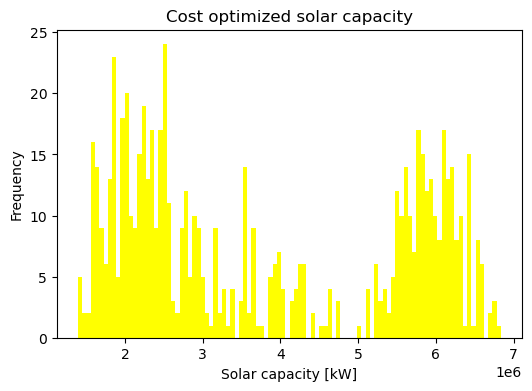

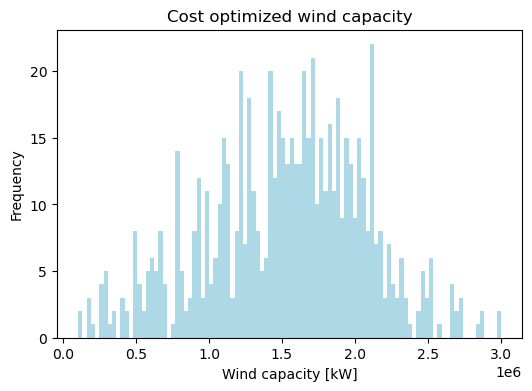

In [32]:
df_cost = df[df['strategy'] == 'cost_conventional']
df_co2 = df[df['strategy'] == 'co2_conventional']
plt.figure(figsize=(6, 4))
plt.title('Cost optimized solar capacity')
plt.xlabel('Solar capacity [kW]')
plt.ylabel('Frequency')
plt.hist(df_cost['solar_capacity [kW]'], bins=100, color = 'yellow')
plt.show()

plt.figure(figsize=(6, 4))
plt.title('Cost optimized wind capacity')
plt.xlabel('Wind capacity [kW]')
plt.ylabel('Frequency')
plt.hist(df_cost['wind_capacity [kW]'], bins=100, color = 'lightblue')
#can you make it so the x-axis has the same max and min values?

plt.show()



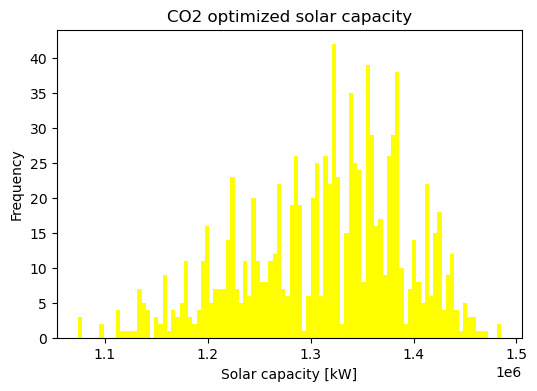

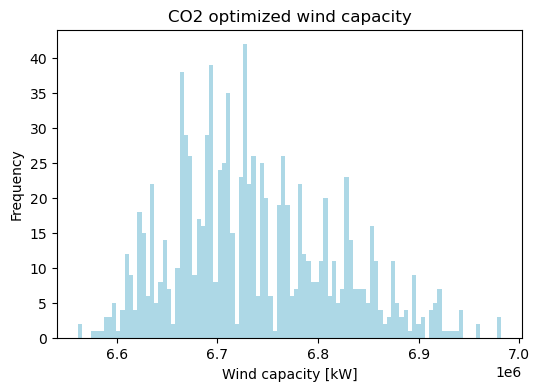

In [33]:
#do the same but for co2
plt.figure(figsize=(6, 4))
plt.title('CO2 optimized solar capacity')
plt.xlabel('Solar capacity [kW]')
plt.ylabel('Frequency')
plt.hist(df_co2['solar_capacity [kW]'], bins=100, color = 'yellow')
plt.show()

plt.figure(figsize=(6, 4))
plt.title('CO2 optimized wind capacity')
plt.xlabel('Wind capacity [kW]')
plt.ylabel('Frequency')
plt.hist(df_co2['wind_capacity [kW]'], bins=100, color = 'lightblue')
plt.show()

In [34]:

# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
# from matplotlib.colors import Normalize

# x = df_co2['solar_capacity [kW]']
# y = df_co2['wind_capacity [kW]']
# # z = df_co2['cost_conventional [$]']
# z = (df_co2['original_cost_new_param [$]']- df_co2['cost_conventional [$]'])/ df_co2['original_cost_new_param [$]']

# # Create a figure and a 3D subplot
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')


# cmap = cm.coolwarm.reversed()
# norm = Normalize(vmin=z.min(), vmax=z.max())
# colors = cmap(norm(z))

# # Plot a 3D scatter plot with variable colors
# ax.scatter(x, y, z, c=colors, marker='o')

# # Set axis labels
# ax.set_xlabel('X: Solar Capacity [kW]')
# ax.set_ylabel('Y: Wind Capacity [kW]')

# # Adjust the position of the z-label
# ax.set_zlabel('Z: Savings [%]')
# # shift the position of the z label a bit to the right
# ax.zaxis.labelpad = 15
# #add title
# ax.set_title('Cost conventional: both objectives')

# #add a colorbar on the left
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Cost savings [%]')
# ax.set_box_aspect([1, 1.2, 1.2]) 

# # Show the plot
# plt.show()


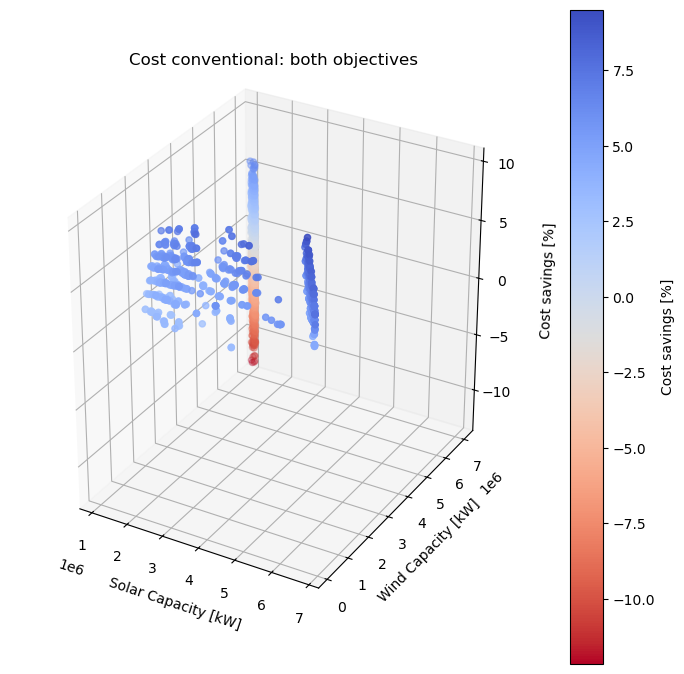

In [35]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize
x = df['solar_capacity [kW]']
y = df['wind_capacity [kW]']
z = (df['original_cost_new_param [$]']- df['cost_conventional [$]'])/ df['original_cost_new_param [$]']*100

# Create a figure and a 3D subplot
fig = plt.figure(figsize=(8.5, 8.5))
ax = fig.add_subplot(111, projection='3d')


cmap = cm.coolwarm.reversed()
norm = Normalize(vmin=z.min(), vmax=z.max())

colors = cmap(norm(z))

ax.scatter(x, y, z, c=colors, marker='o')

ax.set_xlabel('Solar Capacity [kW]')
ax.set_ylabel('Wind Capacity [kW]')
ax.set_zlabel('Cost savings [%]')
ax.zaxis.labelpad = 15

ax.set_title('Cost conventional: both objectives')

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='Cost savings [%]')
ax.set_box_aspect([1, 1.2, 1.2]) 

# Show the plot
plt.show()


C:\Users\thibo\AppData\Local\Temp\ipykernel_26128\1971108397.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = plt.scatter(x, y, c=colors, cmap=cmap)


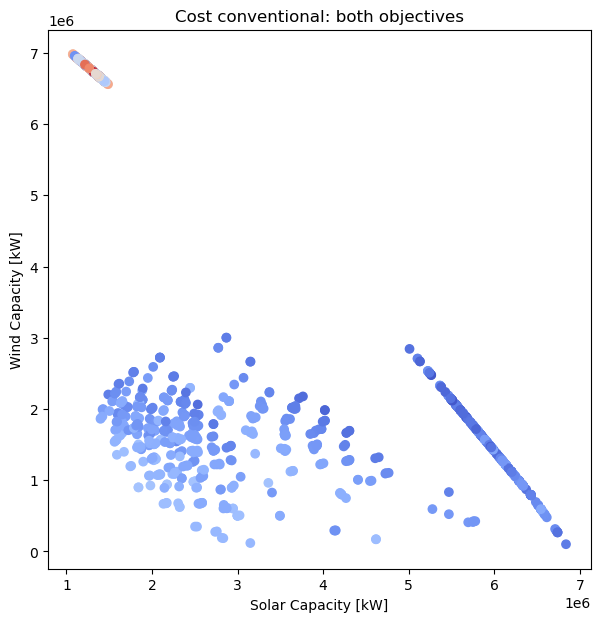

In [36]:
# Extract data
x = df['solar_capacity [kW]']
y = df['wind_capacity [kW]']
# z = df['cost_conventional [$]']
z = (df['original_cost_new_param [$]']- df['cost_conventional [$]'])/ df['original_cost_new_param [$]']*100

cmap = cm.coolwarm.reversed()
norm = Normalize(vmin=z.min(), vmax=z.max())
colors = cmap(norm(z))

# Create a 2D scatter plot for X-Y Variation with the updated colormap
plt.figure(figsize=(7, 7))
sc = plt.scatter(x, y, c=colors, cmap=cmap)
plt.xlabel('Solar Capacity [kW]')
plt.ylabel('Wind Capacity [kW]')
plt.title('Cost conventional: both objectives')
# cbar = plt.colorbar(sc, label='Cost savings [%]')
plt.show()


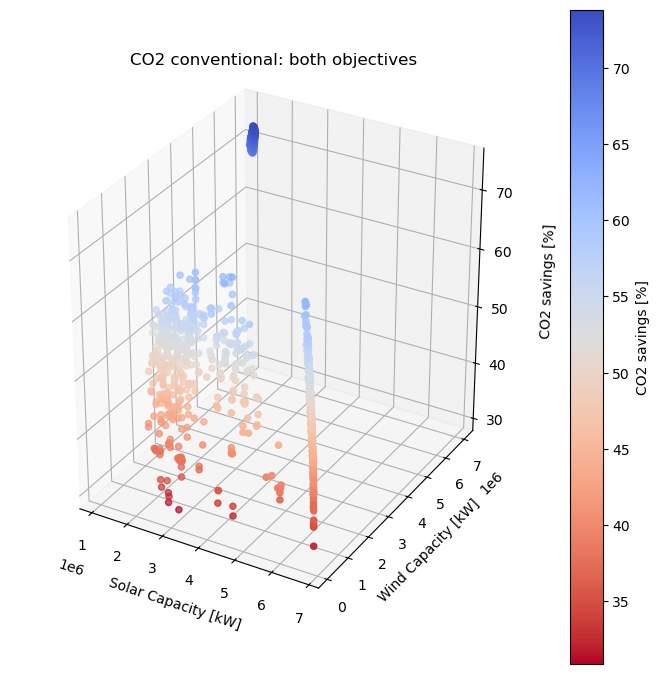

In [37]:
x = df['solar_capacity [kW]']
y = df['wind_capacity [kW]']

z = (df['original_co2_new_param [kg]']- df['co2_conventional [kg]'])/df['original_co2_new_param [kg]']*100

fig = plt.figure(figsize=(8.5, 8.5))
ax = fig.add_subplot(111, projection='3d')


cmap = cm.coolwarm.reversed()
norm = Normalize(vmin=z.min(), vmax=z.max())
colors = cmap(norm(z))

# Plot a 3D scatter plot with variable colors
ax.scatter(x, y, z, c=colors, marker='o')

# Set axis labels
ax.set_xlabel('Solar Capacity [kW]')
ax.set_ylabel('Wind Capacity [kW]')

# Adjust the position of the z-label
ax.set_zlabel('CO2 savings [%]')
ax.zaxis.labelpad = 15
#add title
plt.title('CO2 conventional: both objectives')


#add a colorbar on the left
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label='CO2 savings [%]')
#can you delete the lines on the side of the colorbar?
ax.set_box_aspect([1, 1.2, 1.2]) 

# Show the plot
plt.show()

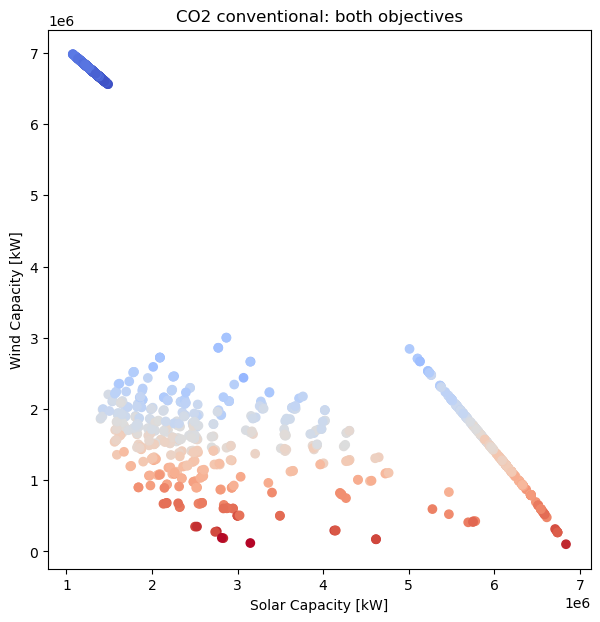

In [38]:
# Extract data
x = df['solar_capacity [kW]']
y = df['wind_capacity [kW]']
z = (df['original_co2_new_param [kg]']- df['co2_conventional [kg]'])/df['original_co2_new_param [kg]']*100

cmap = cm.coolwarm.reversed()
norm = Normalize(vmin=z.min(), vmax=z.max())
colors = cmap(norm(z))

plt.figure(figsize=(7, 7))
sc = plt.scatter(x, y, c=colors)
plt.xlabel('Solar Capacity [kW]')
plt.ylabel('Wind Capacity [kW]')
plt.title('CO2 conventional: both objectives')

plt.show()

# Scenarioplanning

In [39]:
df['savings_co2 [%]'] = (df['original_co2_new_param [kg]']- df['co2_conventional [kg]'])/df['original_co2_new_param [kg]']*100
df['savings_cost [%]'] = (df['original_cost_new_param [$]']- df['cost_conventional [$]'])/ df['original_cost_new_param [$]']*100
df['total_capacity [kW]'] = df['solar_capacity [kW]'] + df['wind_capacity [kW]'] 
df['wind/solar capacity ratio'] = df['wind_capacity [kW]']/df['solar_capacity [kW]']
df = df[df['wind_capacity [kW]']<= 4000000]
#drop rows where savings are negative
df = df[df['savings_co2 [%]'] >= 0]
df = df[df['savings_cost [%]'] >= 0]

df.reset_index(inplace=True, drop=True)
df


,strategy,price_hydro [$/kWh],price_solar [$/kWh],price_wind [$/kWh],price_thermal [$/kWh],price_cogen [$/kWh],co2_hydro [kg/kWh],co2_solar [kg/kWh],co2_wind [kg/kWh],co2_thermal [kg/kWh],...,wind_capacity [kW],solar_capacity [kW],cost_conventional [$],co2_conventional [kg],original_cost_new_param [$],original_co2_new_param [kg],savings_co2 [%],savings_cost [%],total_capacity [kW],wind/solar capacity ratio
0,cost_conventional,0.0627,0.068410,0.090970,0.132,0.07035,0.0228,0.03895,0.01100,0.4950,...,1.617271e+06,2.717409e+06,1.021568e+10,6.941601e+09,1.089332e+10,1.433825e+10,51.586827,6.220702,4.334680e+06,0.595152
1,cost_conventional,0.0594,0.064989,0.086421,0.120,0.07370,0.0216,0.04305,0.00990,0.6050,...,1.462993e+06,2.697024e+06,9.654623e+09,7.943219e+09,1.021673e+10,1.670816e+10,52.459051,5.501868,4.160017e+06,0.542447
2,cost_conventional,0.0660,0.075251,0.095519,0.120,0.06030,0.0240,0.04100,0.01210,0.5775,...,1.102565e+06,2.287106e+06,1.061745e+10,9.067473e+09,1.102249e+10,1.638141e+10,44.647779,3.674624,3.389671e+06,0.482079
3,cost_conventional,0.0726,0.061569,0.090970,0.126,0.07370,0.0216,0.04305,0.00990,0.5500,...,1.225637e+06,6.127184e+06,1.104254e+10,7.939355e+09,1.197357e+10,1.543547e+10,48.564203,7.775698,7.352821e+06,0.200033
4,cost_conventional,0.0660,0.064989,0.090970,0.132,0.06700,0.0216,0.04510,0.01210,0.5225,...,1.497035e+06,5.939669e+06,1.050087e+10,7.360611e+09,1.129061e+10,1.485015e+10,50.434098,6.994684,7.436703e+06,0.252040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,cost_conventional,0.0627,0.068410,0.086421,0.114,0.06030,0.0264,0.03895,0.01210,0.5775,...,1.391997e+06,2.483792e+06,1.001780e+10,8.565002e+09,1.047147e+10,1.662618e+10,48.484861,4.332463,3.875788e+06,0.560432
685,cost_conventional,0.0726,0.064989,0.081873,0.126,0.07035,0.0264,0.04305,0.01155,0.5225,...,2.308365e+06,5.379101e+06,1.100540e+10,6.914999e+09,1.197053e+10,1.543842e+10,55.209157,8.062602,7.687466e+06,0.429136
686,cost_conventional,0.0693,0.064989,0.086421,0.132,0.06365,0.0216,0.04510,0.00990,0.6050,...,1.936099e+06,5.636309e+06,1.076753e+10,7.364864e+09,1.169078e+10,1.671046e+10,55.926636,7.897254,7.572407e+06,0.343505
687,cost_conventional,0.0594,0.071831,0.081873,0.120,0.06030,0.0252,0.04305,0.01210,0.6050,...,1.923652e+06,1.650391e+06,9.646288e+09,7.802098e+09,1.020359e+10,1.713555e+10,54.468361,5.461820,3.574043e+06,1.165573


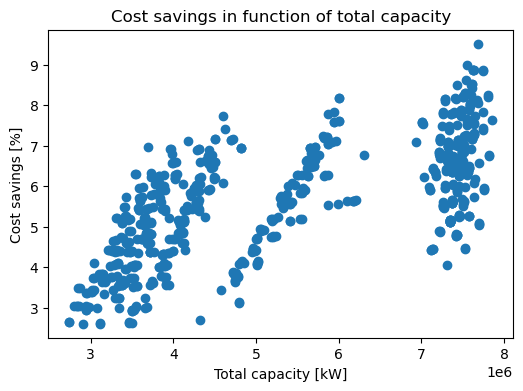

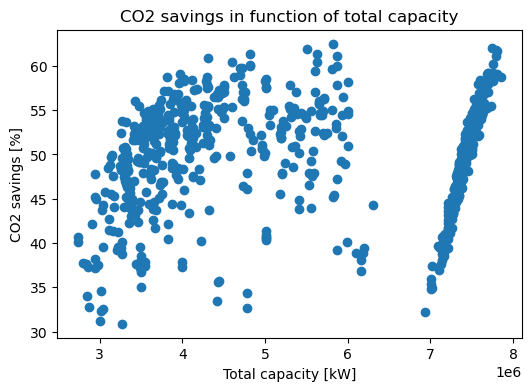

In [40]:
#plot the savings in cost and co2 in function of the total capacity
plt.figure(figsize=(6, 4))
plt.title('Cost savings in function of total capacity')
plt.xlabel('Total capacity [kW]')
plt.ylabel('Cost savings [%]')
plt.scatter(df['total_capacity [kW]'], df['savings_cost [%]'])
plt.show()

plt.figure(figsize=(6, 4))
plt.title('CO2 savings in function of total capacity')
plt.xlabel('Total capacity [kW]')
plt.ylabel('CO2 savings [%]')
plt.scatter(df['total_capacity [kW]'], df['savings_co2 [%]'])
plt.show()


In [41]:
# #try linear regression to predict CO2 savings in function of the wind and solar capacity
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, r2_score
# print(" --- CO2 ---")
# X = df[['solar_capacity [kW]', 'wind_capacity [kW]']]
# y = df['savings_co2 [%]']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# reg = LinearRegression().fit(X_train, y_train)
# print("R2 score: ", reg.score(X_test, y_test))
# print("Coefficients: ", reg.coef_)
# print("Intercept: ", reg.intercept_)
# y_pred = reg.predict(X_test)
# print("Mean squared error: ", mean_squared_error(y_test, y_pred))
# print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

# #plot the predictions
# plt.figure(figsize=(6, 4))
# plt.title('CO2 savings in function of total capacity')
# plt.xlabel('Total capacity [kW]')
# plt.ylabel('CO2 savings [%]')
# plt.scatter(y_test, y_pred)

# print(" --- COST ---")
# X = df[['solar_capacity [kW]', 'wind_capacity [kW]', 'savings_co2 [%]']]
# y = df['savings_cost [%]']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# reg = LinearRegression().fit(X_train, y_train)
# print("R2 score: ", reg.score(X_test, y_test))
# print("Coefficients: ", reg.coef_)
# print("Intercept: ", reg.intercept_)
# y_pred = reg.predict(X_test)
# print("Mean squared error: ", mean_squared_error(y_test, y_pred))
# print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))




In [54]:

df['normalized_co2_savings'] = (df['savings_co2 [%]'] - df['savings_co2 [%]'].min()) / (df['savings_co2 [%]'].max() - df['savings_co2 [%]'].min())
df['normalized_cost_savings'] = (df['savings_cost [%]'] - df['savings_cost [%]'].min()) / (df['savings_cost [%]'].max() - df['savings_cost [%]'].min())

weight_variations = [
    {"capacity_weight": 0.4, "co2_weight": 0.3, "cost_weight": 0.3},
    {"capacity_weight": 0.3, "co2_weight": 0.4, "cost_weight": 0.3},
    {"capacity_weight": 0.3, "co2_weight": 0.3, "cost_weight": 0.4},
    {"capacity_weight": 0.5, "co2_weight": 0.2, "cost_weight": 0.3},
    {"capacity_weight": 0.2, "co2_weight": 0.5, "cost_weight": 0.3},
    {"capacity_weight": 0.2, "co2_weight": 0.3, "cost_weight": 0.5},
    {"capacity_weight": 0.6, "co2_weight": 0.1, "cost_weight": 0.3},
    {"capacity_weight": 0.6, "co2_weight": 0.3, "cost_weight": 0.1},
    {"capacity_weight": 0.1, "co2_weight": 0.6, "cost_weight": 0.3},
    {"capacity_weight": 0.1, "co2_weight": 0.3, "cost_weight": 0.6}
]

averaged_results_df = pd.DataFrame(columns=[])

for i, weights in enumerate(weight_variations):
    def calculate_score(row):
        return (
            (weights["capacity_weight"] * (row['wind_capacity [kW]'] + row['solar_capacity [kW]'])) +
            (weights["co2_weight"] * row['normalized_co2_savings']) +
            (weights["cost_weight"] * row['normalized_cost_savings'])
        )


    df['score'] = df.apply(calculate_score, axis=1)

    best_scenarios = df.sort_values(by='score', ascending=False)
    # print(best_scenarios.head(1))
    # avg_wind_capacity = best_scenarios['wind_capacity [kW]'].mean()
    # avg_solar_capacity = best_scenarios['solar_capacity [kW]'].mean()
    # avg_co2_savings = best_scenarios['savings_co2 [%]'].mean()
    # avg_cost_savings = best_scenarios['savings_cost [%]'].mean()
 
    # variation_df = pd.DataFrame({
    #     "Capacity Weight": [weight_variations[i]["capacity_weight"]],
    #     "CO2 Weight": [weight_variations[i]["co2_weight"]],
    #     "Cost Weight": [weight_variations[i]["cost_weight"]],
    #     "Averaged Wind Capacity [kW]": [avg_wind_capacity],
    #     "Averaged Solar Capacity [kW]": [avg_solar_capacity],
    #     "Averaged CO2 Savings [%]": [avg_co2_savings],
    #     "Averaged Cost Savings [%]": [avg_cost_savings]
    # })

    # averaged_results_df = averaged_results_df.append(variation_df, ignore_index=True)

best_scenarios.reset_index(inplace=True, drop=True)
n_rows = 689
n_results_ = 10
#make a list with values in increments of 69 but starting from 0 up to 689
indexes = np.arange(0, n_rows, int(n_rows/n_results_))
print(indexes)
results = pd.DataFrame(columns=['wind_capacity [kW]', 'solar_capacity [kW]', 'savings_co2 [%]', 'savings_cost [%]', 'total_capacity [kW]', 'score'])
for i in indexes:
    row = best_scenarios.iloc[i]
    print(row['wind_capacity [kW]'], row['solar_capacity [kW]'], row['savings_co2 [%]'], row['savings_cost [%]'], row['total_capacity [kW]'], row['score'])
    results = results.append(row, ignore_index=True)
columns_to_keep = ['wind_capacity [kW]', 'solar_capacity [kW]', 'savings_co2 [%]', 'savings_cost [%]', 'total_capacity [kW]', 'score']
results = results[columns_to_keep]
results
#make csv file
results.to_excel('10_scenarios_out_of_689.xlsx')

[  0  68 136 204 272 340 408 476 544 612 680]
2844103.85997871 5008945.73523242 58.76303865747444 7.624593141662593 7853049.59521113 785305.6599761242
1814502.95464541 5720322.12270062 54.542896276237975 8.617275788244687 7534825.077346031 753483.254298237
1379143.29071903 6021122.7371611 48.002266645960894 7.0118191748944625 7400266.02788013 740027.1479321747
925568.3756319 6334508.71309555 44.41204304110485 7.7904396136212695 7260077.08872745 726008.2875242449
1497449.35702965 4257283.35843975 52.46609197110589 6.76254018991468 5754732.7154693995 575473.8374188757
2166974.2907467 2834009.84699382 58.25294828811045 4.684085929439031 5000984.13774052 500098.8541667162
2120572.4646742 2182551.55208552 54.172211053496454 5.40927891048909 4303124.01675972 430312.86628351745
2069402.68772219 1835377.06696242 56.65582362194459 3.5899682257602996 3904779.7546846103 390478.30573966034
1334912.59645275 2324605.61447248 48.24779096987354 3.245301874275963 3659518.21092523 365952.0416519523
1102

C:\Users\thibo\AppData\Local\Temp\ipykernel_26128\2455243174.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
C:\Users\thibo\AppData\Local\Temp\ipykernel_26128\2455243174.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
C:\Users\thibo\AppData\Local\Temp\ipykernel_26128\2455243174.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_index=True)
C:\Users\thibo\AppData\Local\Temp\ipykernel_26128\2455243174.py:59: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(row, ignore_inde